<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Dataset-Description" data-toc-modified-id="Dataset-Description-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dataset Description</a></span></li></ul></li><li><span><a href="#Import-Library" data-toc-modified-id="Import-Library-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Library</a></span></li><li><span><a href="#Data-Loading" data-toc-modified-id="Data-Loading-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Loading</a></span><ul class="toc-item"><li><span><a href="#Dataset-Exploration" data-toc-modified-id="Dataset-Exploration-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dataset Exploration</a></span></li></ul></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Exploration</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>PCA</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Visualization</a></span></li></ul></div>

# Introduction

**Name:** Fadilah Nur Imani
<br>
**Class/Batch/Phase:** FTDS/001/01
<br>
**Non-graded Challenge:** 03

## Dataset Description

Source: https://www.kaggle.com/mlg-ulb/creditcardfraud

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data Loading

In [3]:
df = pd.read_csv('creditcard.csv')

## Dataset Exploration

In [4]:
print(df.shape)
df.info()

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


# Data Cleaning

In [6]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [7]:
df.duplicated().any()

True

In [8]:
df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [9]:
df.drop_duplicates(keep='first', inplace=False)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Data Exploration

In [10]:
features = df.drop(columns=["Class"]).columns.tolist()
len(features)

30

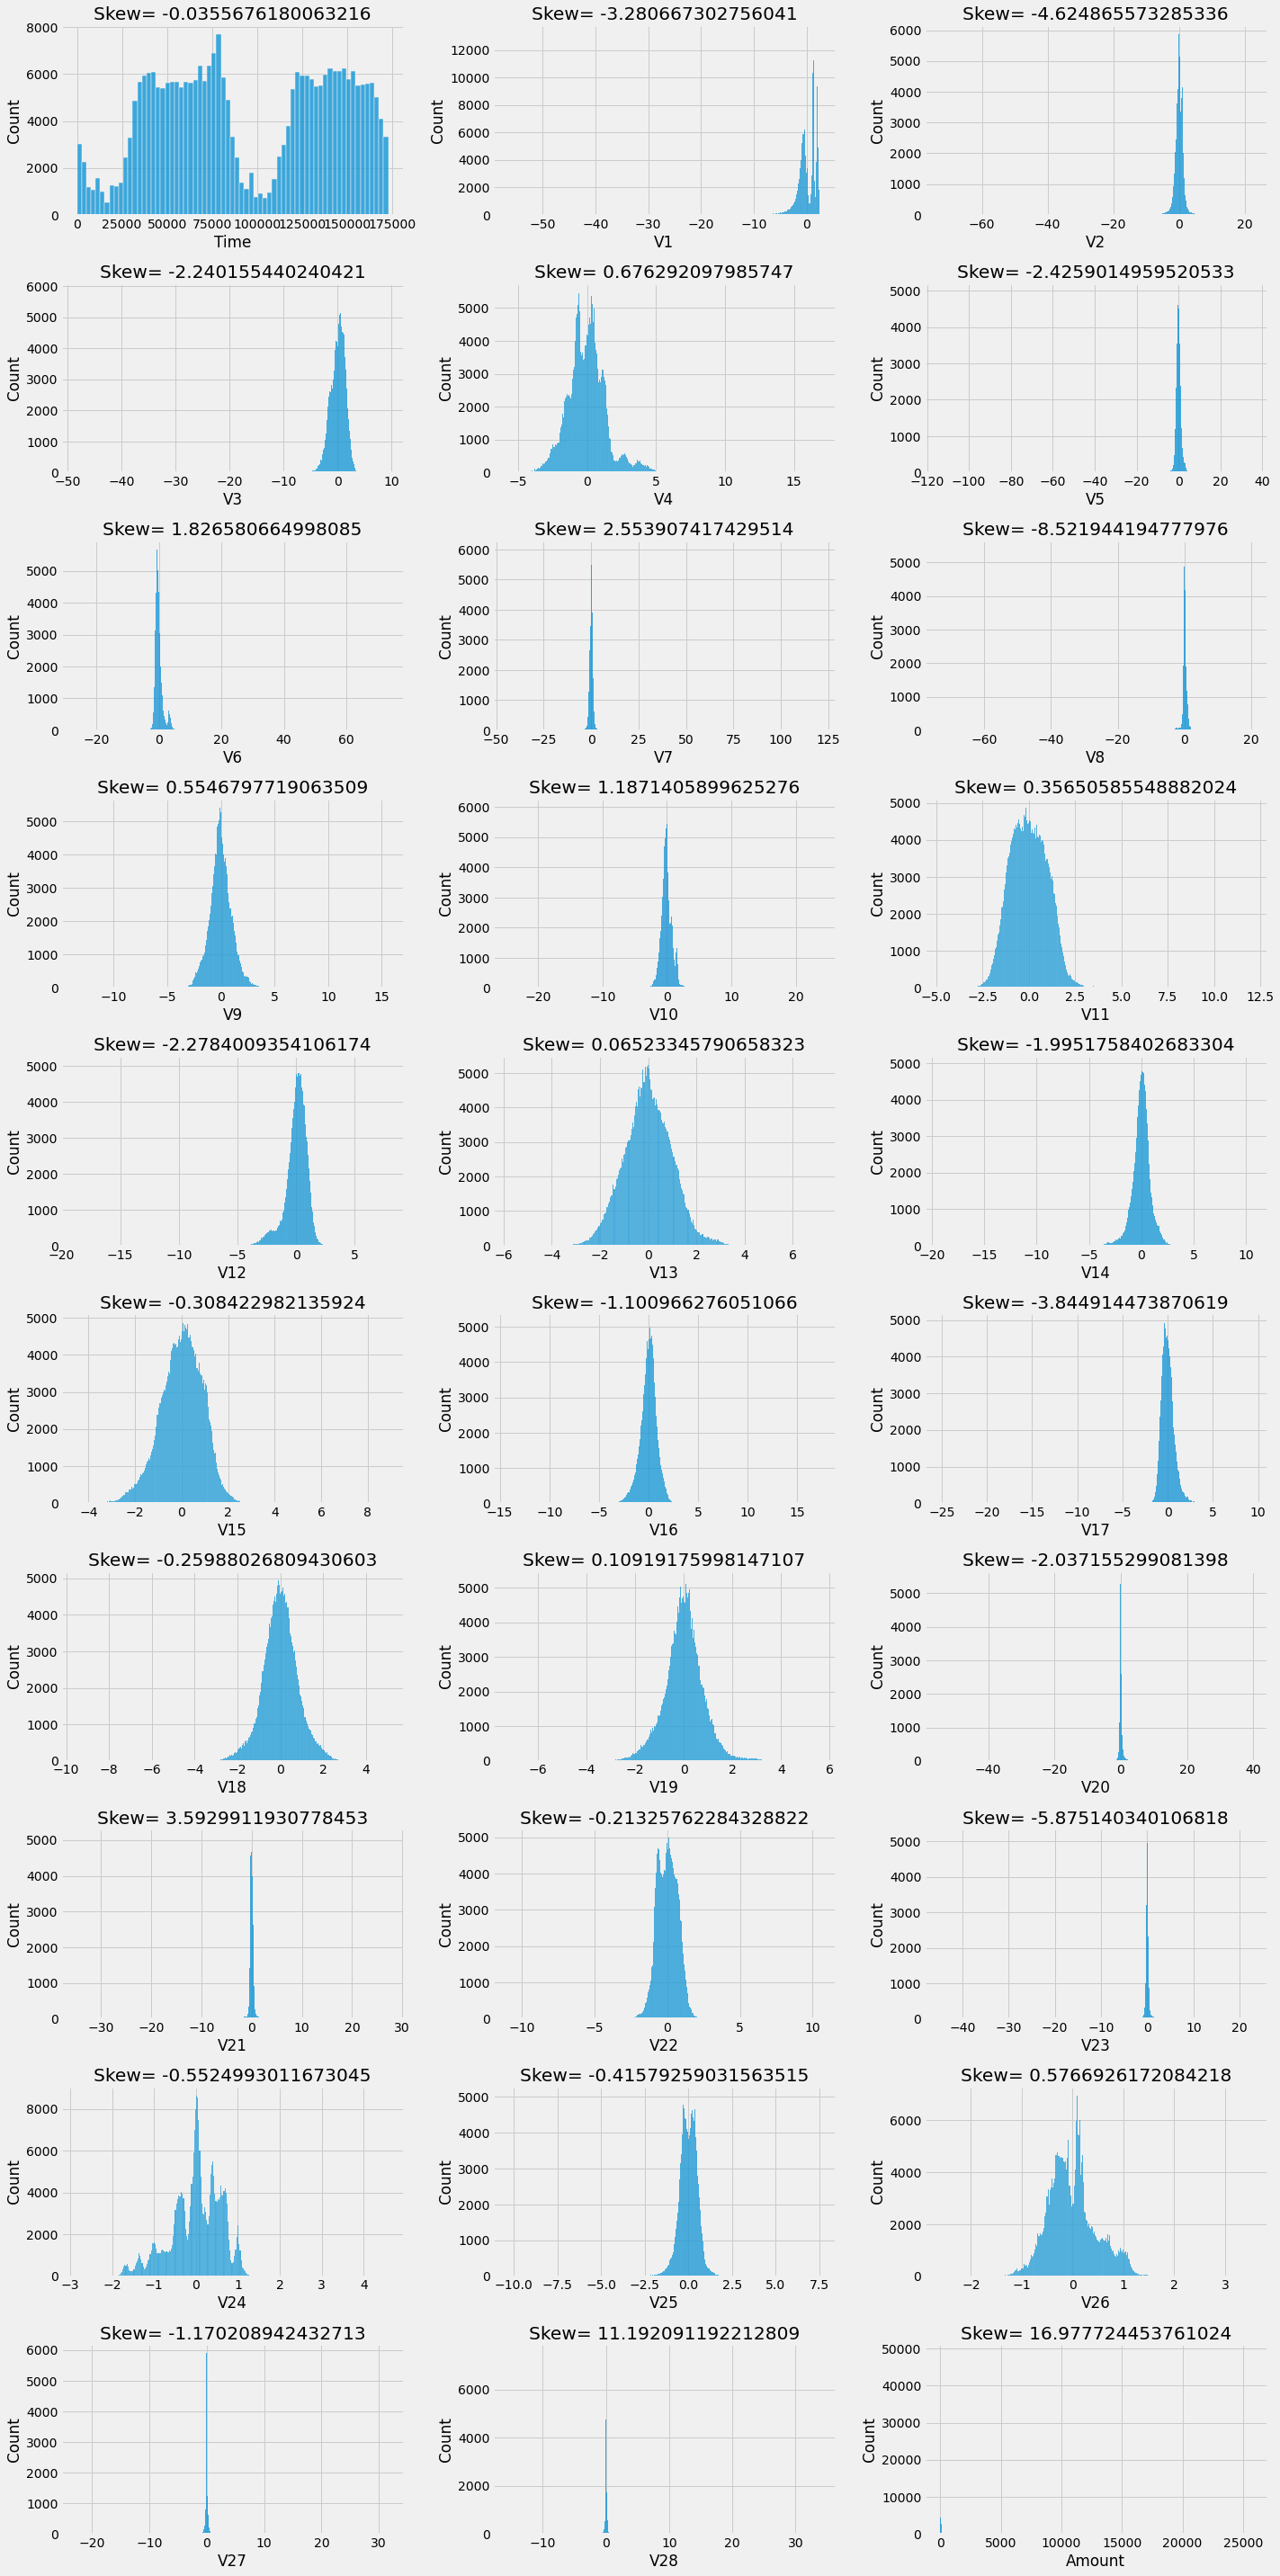

In [11]:
plt.figure(figsize=(20, 40))
for i in range(len(features)):
    plt.subplot(len(features)//3, 3, i + 1)
    sns.histplot(
        x = df[features[i]]
    )
    plt.title(f"Skew= {df[features[i]].skew()}")
plt.tight_layout()
plt.show()

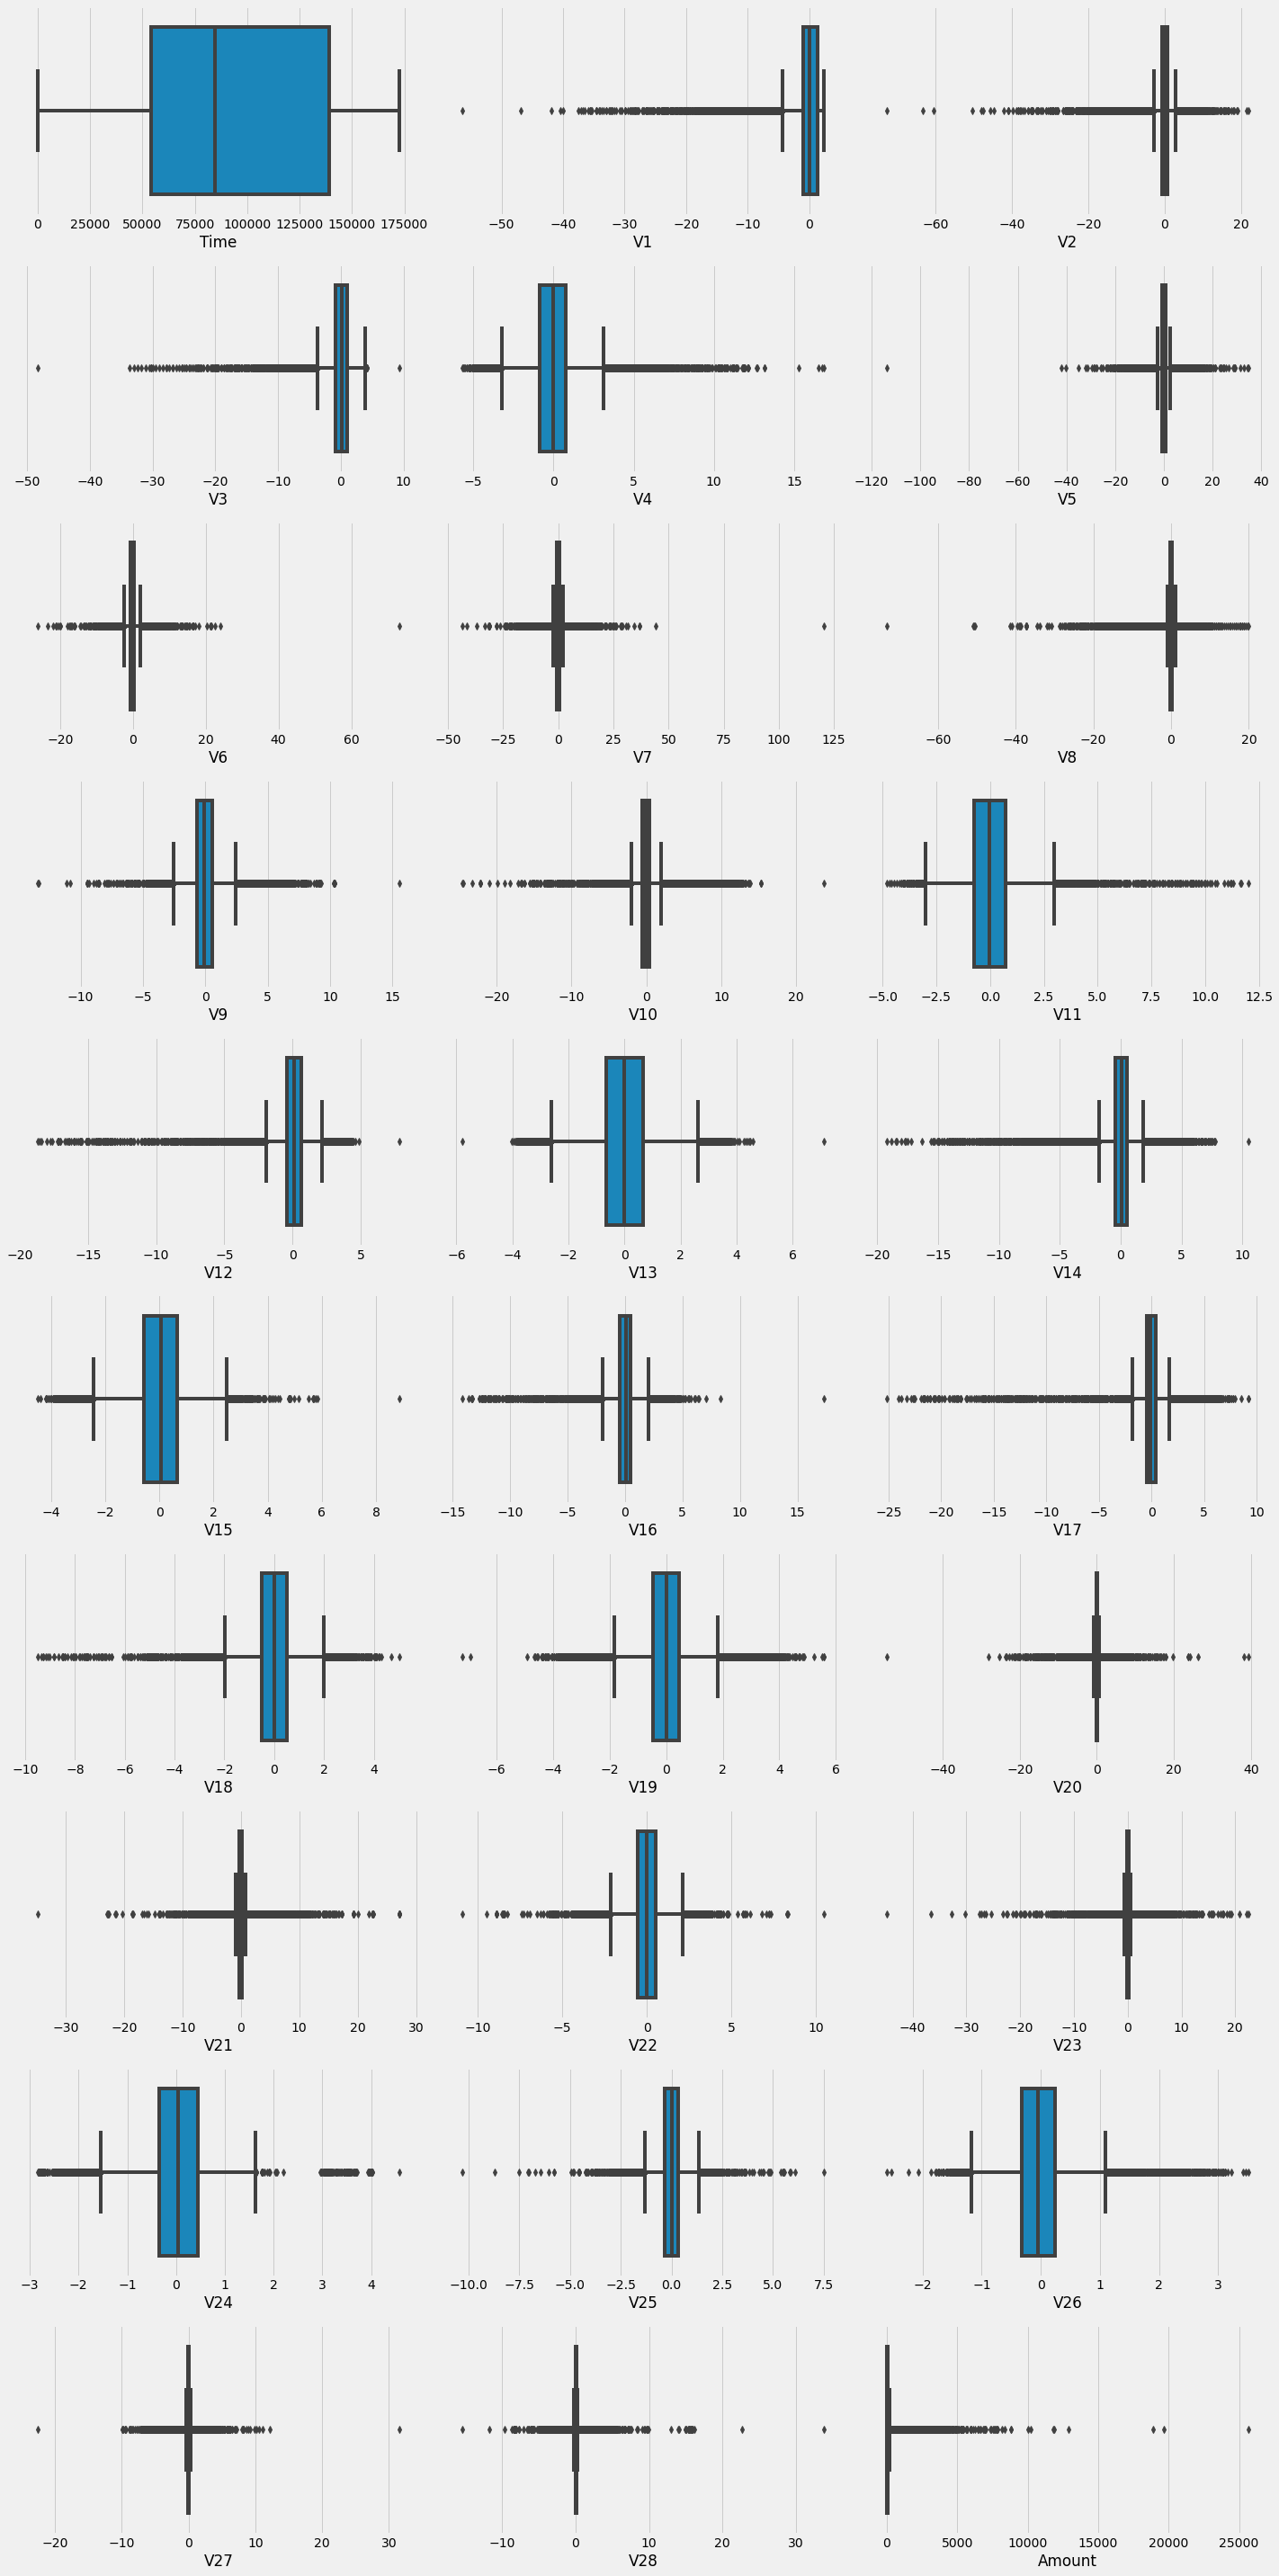

In [12]:
plt.figure(figsize=(20, 40))
for i in range(len(features)):
    plt.subplot(len(features)//3, 3, i + 1)
    sns.boxplot(
        x = df[features[i]]
    )
plt.tight_layout()
plt.show()

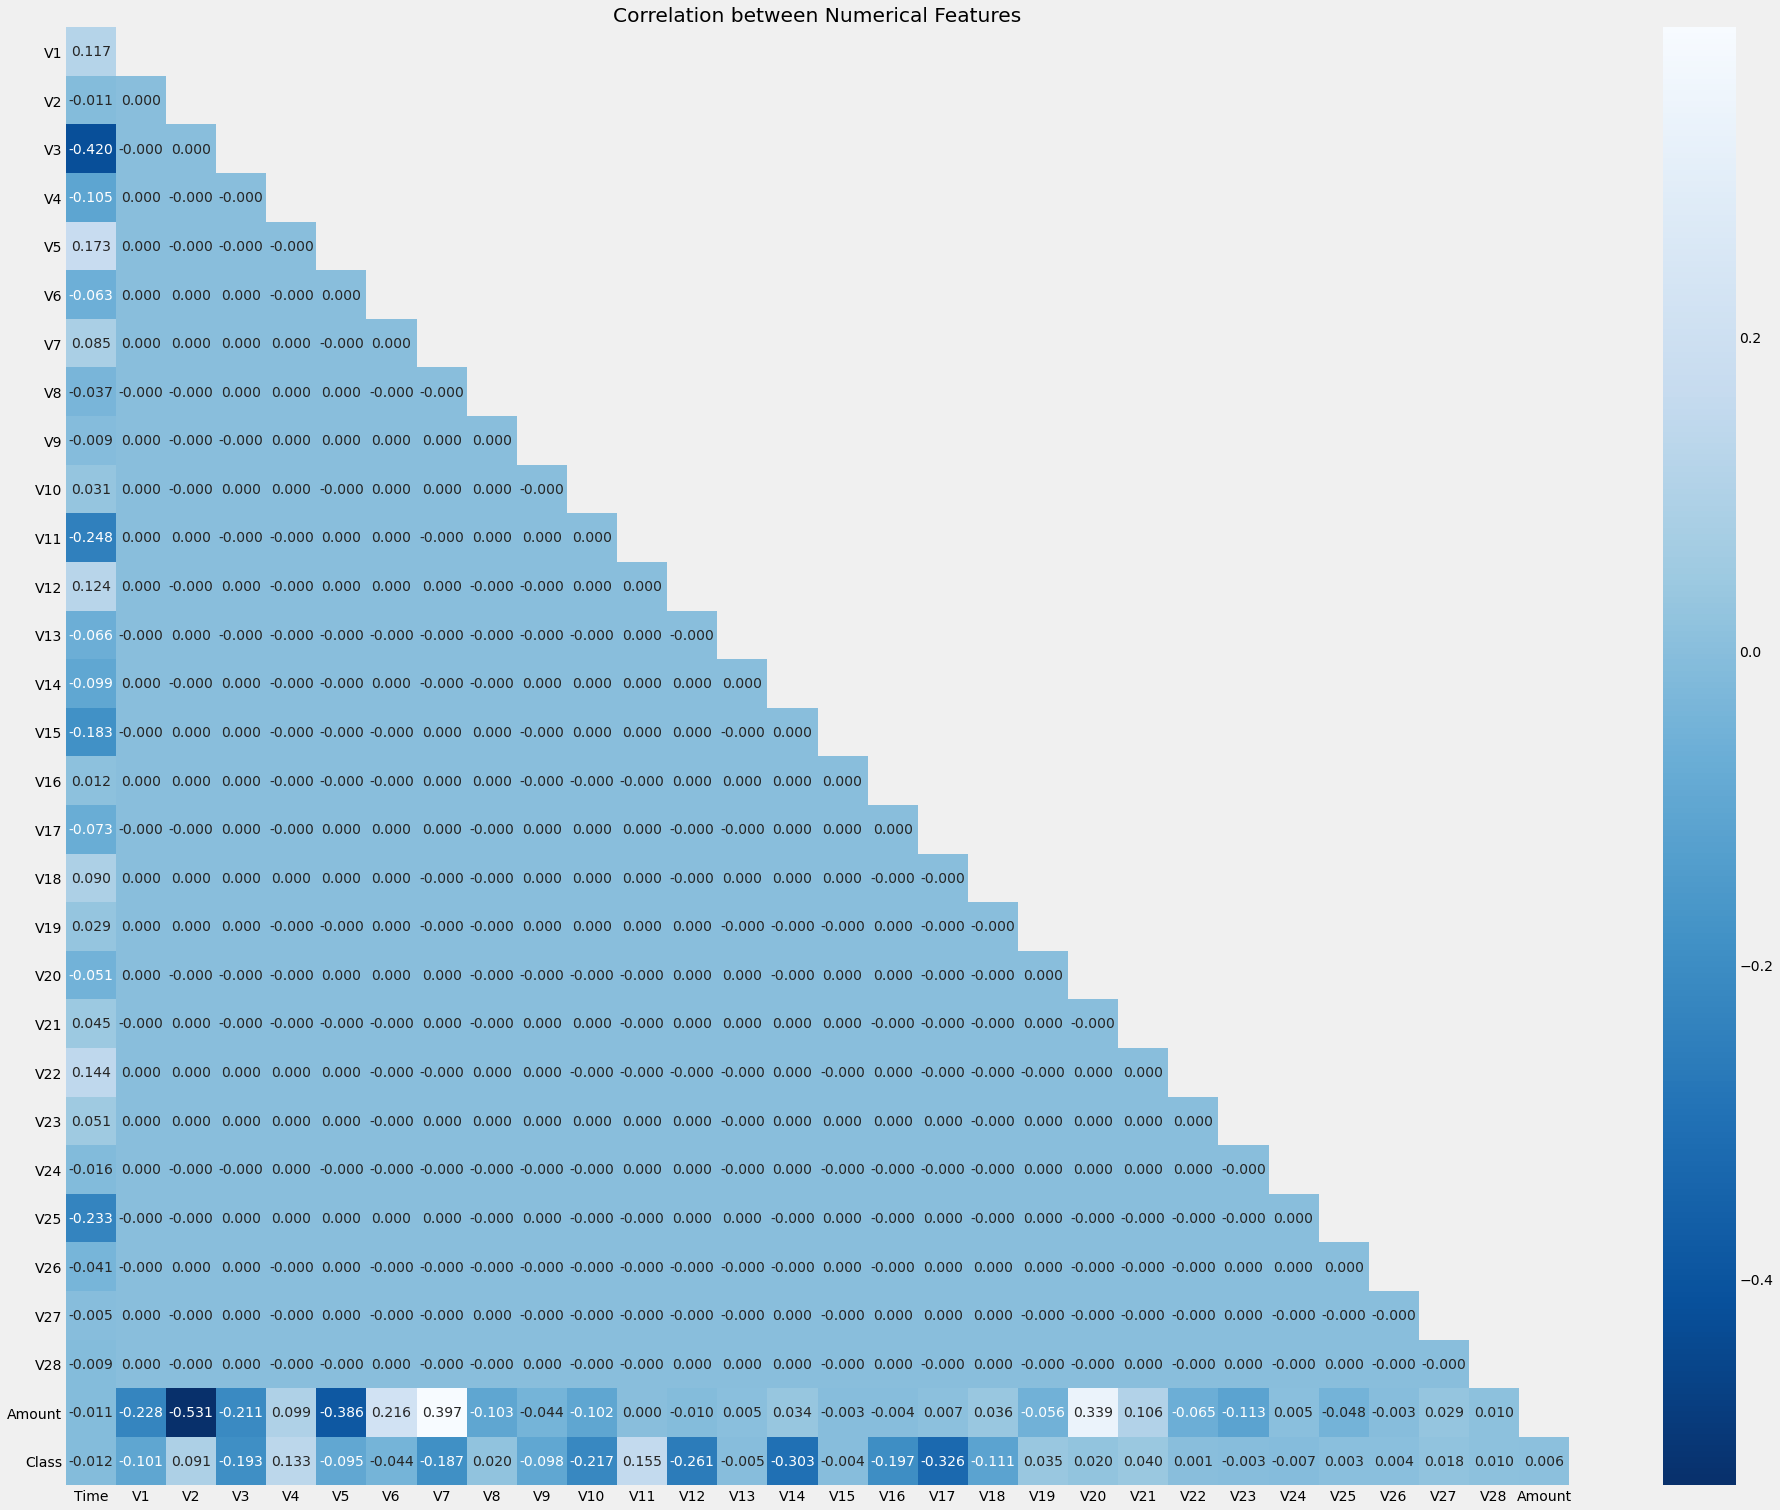

In [13]:
corr_ = df[features + ["Class"]].corr(method = 'pearson')
corr_ = corr_.mask(np.tril(np.ones(corr_.shape)).T.astype(np.bool_)).drop(index=["Time"], columns=["Class"])

plt.figure(figsize = (30, 25))
sns.heatmap(
    corr_,
    annot = True,
    fmt = '.3f',
    cmap = 'Blues_r'
)
plt.title("Correlation between Numerical Features")
plt.yticks(rotation=0)
plt.show()

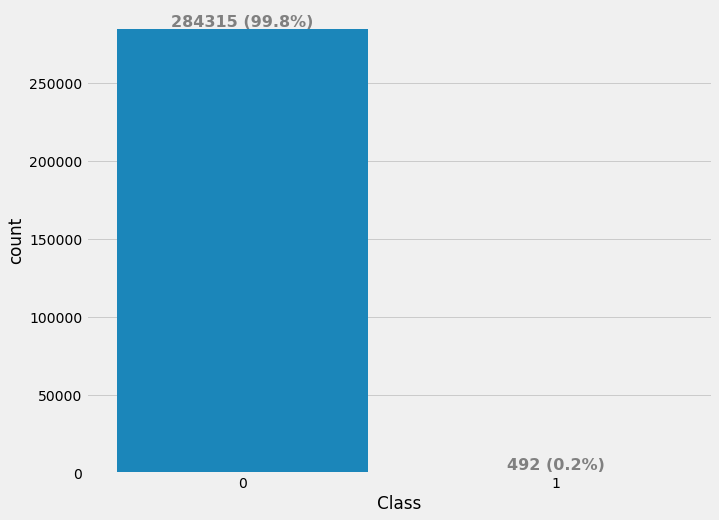

In [42]:
plt.figure(figsize=(10,8))
ax = sns.countplot(
    x = df["Class"]
)
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f') + " (" + format(p.get_height()*100/len(df), '.1f') + "%)",
        (p.get_x() + p.get_width() / 2., p.get_height()+14500), 
        ha = 'center',
        fontweight = 'semibold',
        size = 16,
        xytext = (0, -20), 
        textcoords = 'offset points',
        color = 'gray'
    )
plt.show()

# Data Preprocessing

In [15]:
X = df.drop(columns=['Class'])
y = df["Class"]

In [16]:
scaler = StandardScaler()
X_trf = scaler.fit_transform(X)

# PCA

In [17]:
pca_explained_ratio = []
pca_explained_ratio_sum = []
for i in range(1, 31):
    pca = PCA(n_components = i, random_state = 42)
    pca.fit_transform(X_trf)
    pca_explained_ratio.append(pca.explained_variance_ratio_)
    pca_explained_ratio_sum.append(pca.explained_variance_ratio_.sum())

In [18]:
for i in range(1, 31):
    print(i, "-", pca_explained_ratio_sum[i-1])

1 - 0.06527333634176359
2 - 0.12138798119159311
3 - 0.1542752854344737
4 - 0.18796277998306266
5 - 0.22124628047841896
6 - 0.2543685219805044
7 - 0.2879291214411427
8 - 0.3212722846521446
9 - 0.3546661740703432
10 - 0.3879433482418184
11 - 0.42132195405859696
12 - 0.4546471881786212
13 - 0.4880143620482102
14 - 0.5212768771868479
15 - 0.5546910662648995
16 - 0.5880457411052725
17 - 0.6213955757551372
18 - 0.6547316774977301
19 - 0.6880650124413219
20 - 0.7213983457746554
21 - 0.7547316791079883
22 - 0.7880650124413221
23 - 0.8213983457746554
24 - 0.8547316791079886
25 - 0.888065012441322
26 - 0.9213983457746552
27 - 0.9547316791079883
28 - 0.988065012441321
29 - 0.9985948365414409
30 - 1.0


In [19]:
pca = PCA()
pca.fit(X_trf)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

27

In [20]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [21]:
pca.explained_variance_ratio_

array([0.06527521, 0.05612313, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.01052982, 0.00140516])

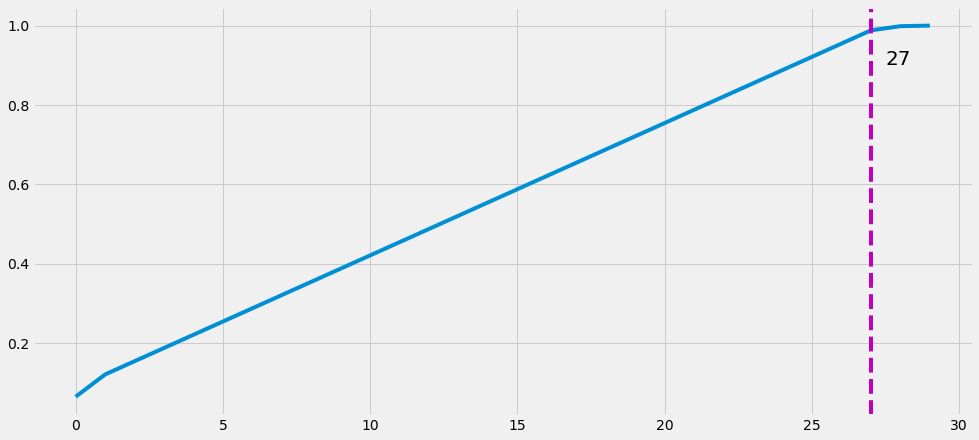

In [22]:
plt.figure(figsize=(15,7))
plt.plot(cumsum)
plt.axvline(np.argmax(cumsum >= 0.95) + 1, linestyle="--", color="m")
plt.text(s = np.argmax(cumsum >= 0.95) + 1, y = 0.9, x = np.argmax(cumsum >= 0.95) + 1.5, fontsize=20)
plt.show()

In [23]:
pca = PCA(n_components = 2, random_state = 42)
X_trf_2D = pca.fit_transform(X_trf)

# Visualization

In [24]:
pca_class = pd.DataFrame({
    "PCA1":X_trf_2D[:,0],
    "PCA2":X_trf_2D[:,1],
    "Class":y
})

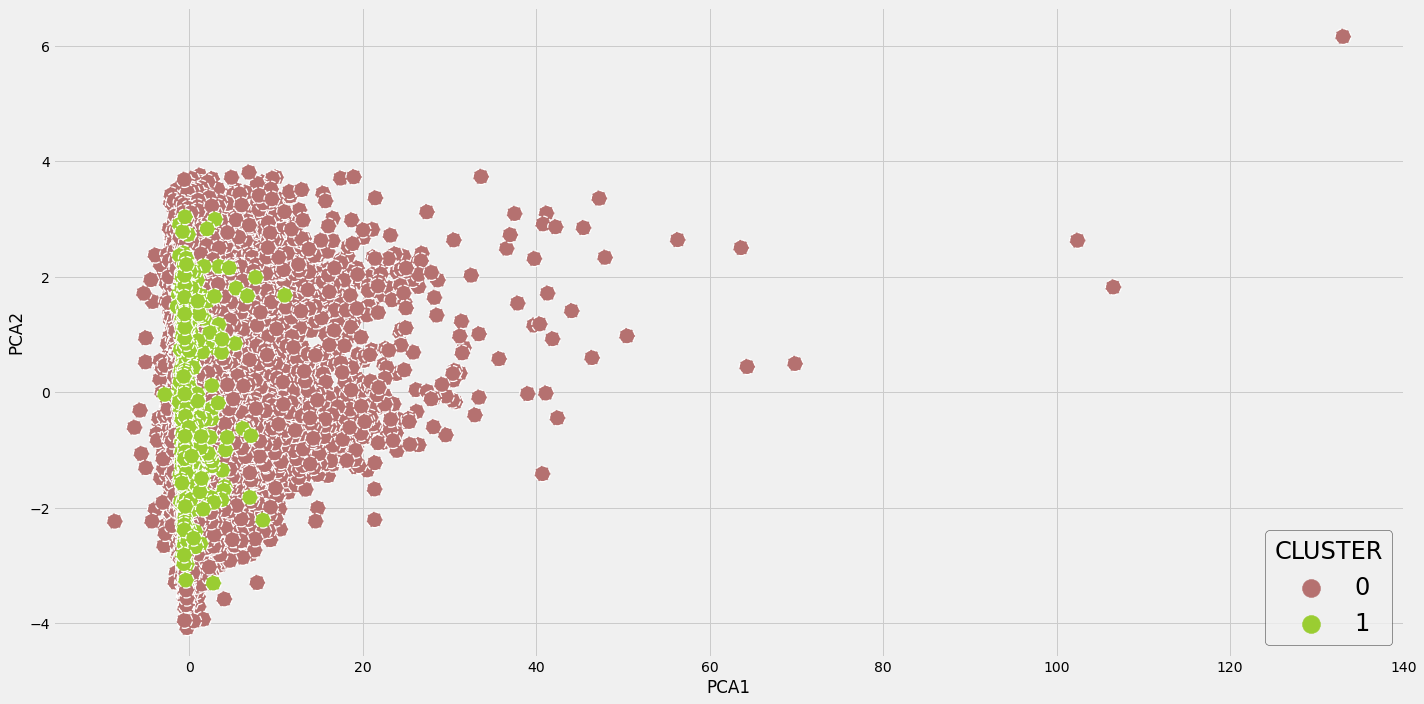

In [25]:
plt.figure(figsize=(20, 10))
hue_order = [0, 1]
palette = {1:"#9ACD32", 0:"#B57170"}
ax = sns.scatterplot(
    x = "PCA1", y = "PCA2", hue = "Class",
    hue_order = hue_order, palette = palette,
    data = pca_class.sort_values("Class", key=np.vectorize(hue_order.index)),
    s = 250,
    edgecolor = 'white',
    linestyle="--"
)
L = ax.legend(fontsize = 24, markerscale = 3, edgecolor = 'black', loc="lower right")
L.set_title('CLUSTER', prop = {'size' : 24})
plt.tight_layout()
plt.show()